In [ ]:
#step0: Import_The_libraries, Prepare_your_data, Initialise_hyperparameters, Set_the_device
#step1: Define_Neural_network
#step2: Define_loss_Function_and_optimizer
#step3: Training 
#step4: Testing

In [4]:
!pip install torch
!pip install torchvision
import torch
import torch.nn as nn
import torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/3e/4f/ad5c2a7d2783649c8ea691441a9f285accae922a1625e21603c45e3ddff4/torchvision-0.17.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.9 MB/s eta 0:00:00a 0:00:01


In [13]:
training_data=torchvision.datasets.MNIST(root='./data',
                           train=True,
                           download=True,
                           transform=torchvision.transforms.ToTensor())
testing_data=torchvision.datasets.MNIST(root='./data',
                           download=True,
                           transform=torchvision.transforms.ToTensor())
                


Using downloaded and verified file: ./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Using downloaded and verified file: ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:01<00:00, 1583834.96it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1844194.46it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [14]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
train_loader=torch.utils.data.DataLoader(dataset=training_data,
                                        batch_size=128,
                                        num_workers=2)
test_loader=torch.utils.data.DataLoader(dataset=testing_data,
                                        batch_size=128,
                                        num_workers=2)

In [16]:
example=iter(train_loader)
images, labels=next(example)

In [17]:
images.shape

torch.Size([128, 1, 28, 28])

In [18]:
labels.shape

torch.Size([128])

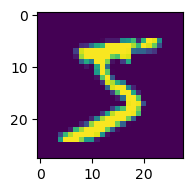

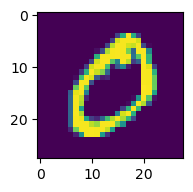

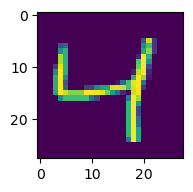

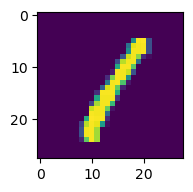

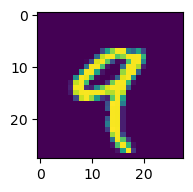

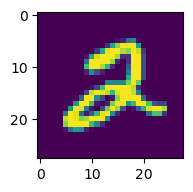

In [19]:
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i][0])
    plt.show()

In [20]:
num_epochs= 3
learning_rate=0.001
input_size=784
hidden_unit=500
output_unit=10

In [21]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
device

device(type='cpu')

In [24]:
class Neural_Net(nn.Module):
    def __init__(self, input_size, hidden_unit, output_unit):
        super(Neural_Net, self).__init__()
        self.flatten=nn.Flatten()
        self.l1=nn.Linear(input_size, hidden_unit)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_unit, output_unit)
    def forward(self, x):
        out=self.flatten(x)#Then_no_need_to_use_reshape
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
    

In [33]:
class Neural_Net(nn.Module):
    def __init__(self, input_size, hidden_unit, output_unit):
        super(Neural_Net, self).__init__()
        self.relu_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_size, hidden_unit),
        nn.ReLU,
        nn.Linear(hidden_unit, output_unit))
        def forward(self, x):
            out=self.relu_stack(x)
            return out

In [26]:
model=Neural_Net(input_size, hidden_unit, output_unit).to(device)

In [27]:
criterion=nn.CrossEntropyLoss()#Cross_entropy_in_pytorch_automatically_take_softmax_of_values_and_one_hot_encoded_values
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
for epochs in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images=images.reshape(-1,784).to(device)
        labels=labels.to(device)
        outputs=model(images)
        loss=criterion(outputs, labels)
        #backward_propagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()#otherwise_they_will_accumulated
        print('iteration:' +str(epochs)+'batch:'+str(i)+'loss:'+str(loss))

iteration:0batch:0loss:tensor(0.1195, grad_fn=<NllLossBackward0>)
iteration:0batch:1loss:tensor(0.2520, grad_fn=<NllLossBackward0>)
iteration:0batch:2loss:tensor(0.1008, grad_fn=<NllLossBackward0>)
iteration:0batch:3loss:tensor(0.2256, grad_fn=<NllLossBackward0>)
iteration:0batch:4loss:tensor(0.1860, grad_fn=<NllLossBackward0>)
iteration:0batch:5loss:tensor(0.1791, grad_fn=<NllLossBackward0>)
iteration:0batch:6loss:tensor(0.2392, grad_fn=<NllLossBackward0>)
iteration:0batch:7loss:tensor(0.1987, grad_fn=<NllLossBackward0>)
iteration:0batch:8loss:tensor(0.4113, grad_fn=<NllLossBackward0>)
iteration:0batch:9loss:tensor(0.2358, grad_fn=<NllLossBackward0>)
iteration:0batch:10loss:tensor(0.2647, grad_fn=<NllLossBackward0>)
iteration:0batch:11loss:tensor(0.1172, grad_fn=<NllLossBackward0>)
iteration:0batch:12loss:tensor(0.1334, grad_fn=<NllLossBackward0>)
iteration:0batch:13loss:tensor(0.1025, grad_fn=<NllLossBackward0>)
iteration:0batch:14loss:tensor(0.0999, grad_fn=<NllLossBackward0>)
itera

In [32]:
n_correct=0
n_samples=0
for images, labels in test_loader:
    images=images.reshape(-1,784).to(device)
    labels=labels.to(device)
    outputs=model(images)
    _, predicted=torch.max(outputs, 1)
    n_correct+=(predicted==labels).sum().item()
    n_samples+=labels.size(0)
Accuracy=(n_correct*100)/n_samples
print(Accuracy)

98.385
